# 车牌字符提取

In [1]:
import cv2
from matplotlib import pyplot as plt

def plt_showRGB(img):
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

# plt显示灰度图片
def plt_showGray(img):
    plt.imshow(img,cmap='gray')
    plt.show()



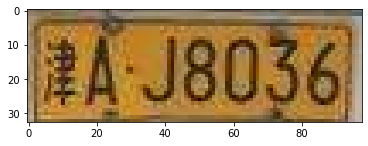

In [2]:
# 从文件加载原图片
img = cv2.imread("./outputImages/plate.png")
plt_showRGB(img)

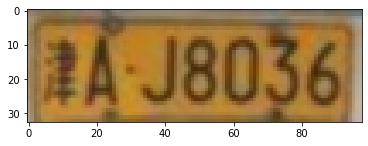

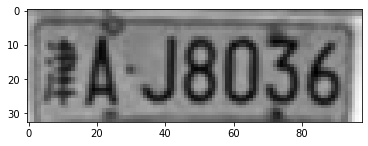

In [3]:
# 用高斯滤波器去噪 
image = cv2.GaussianBlur(img, (3, 3), 0)
plt_showRGB(image)
# 灰度处理
imgGray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_showGray(imgGray)

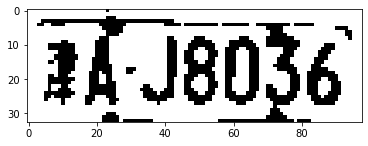

In [4]:
# 自适应阈值处理
ret, image = cv2.threshold(imgGray, 127, 255, cv2.THRESH_OTSU)
plt_showGray(image)

(33, 98)
white:  2299 blcak: 935


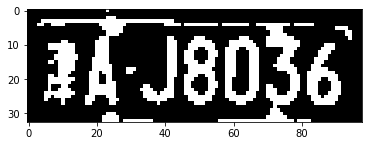

In [5]:
'''
处理绿牌照问题，让需要的车牌号码始终为前景，即白色
通过计算二值图像黑白点的个数，当白的个数大于黑点个数
用阈值分割实现黑白反转
'''
area_white = 0
area_black = 0
height, width = image.shape
print(image.shape)
for i in range(height):
    for j in range(width):
        if image[i, j] == 255:
            area_white += 1
        else:
            area_black += 1
print('white: ',area_white,'blcak:',area_black)
if area_white>area_black:
    ret, image = cv2.threshold(imgGray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    plt_showGray(image)

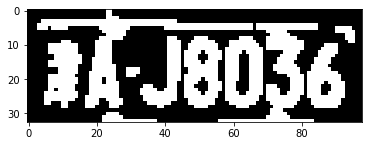

True

In [6]:
# 创建一个结构元素，用于形态学处理
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
# 膨胀操作，使单个文字成为一体，特指中文（因为中文文字整体不相连）
image = cv2.dilate(image, kernel)
plt_showGray(image)
# 保存图像
cv2.imwrite('./outputImages/plate_b.png', image)

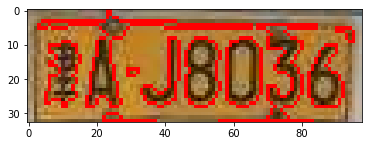

边缘个数为： 10


In [7]:
# cv2.findContours 轮廓检测
# 获取轮廓
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
image1 = img.copy()
cv2.drawContours(image1, contours, -1, (0, 0, 255), 1)
plt_showRGB(image1)
print('边缘个数为：',len(contours))

[[3, 0, 63, 29], [5, 9, 11, 20], [22, 30, 16, 3], [29, 17, 4, 3], [33, 8, 12, 21], [46, 8, 11, 21], [56, 4, 29, 29], [58, 8, 11, 21], [82, 10, 11, 19], [90, 5, 6, 5]]


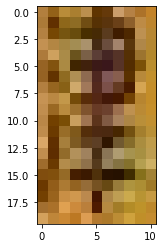

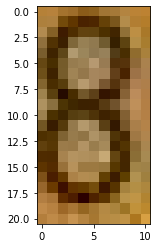

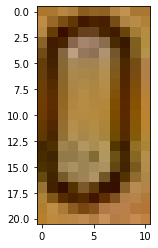

In [8]:
# 筛选出各个字符的位置的轮廓
words = []
for item in contours:
    # cv2.boundingRect找出一个能框住图形的最小的矩形
    word = []
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    width = rect[2]
    height = rect[3]
    word.append(x)
    word.append(y)
    word.append(width)
    word.append(height)
    words.append(word)
    
words = sorted(words,key=lambda s:s[0],reverse=False)
    
print(words)

# 按照 height/weight 大概为 1.8 ~ 3.5 （3.5是因为数字 1 的长宽比比较大）
i = 0
for word in words:
    if (word[3] > (word[2] * 1.8)) and (word[3] < (word[2] * 3.5)):
        i = i+1
        image = img[word[1]:word[1] + word[3], word[0]:word[0] + word[2]]
        plt_showRGB(image)
        #cv2.imwrite('./outputImages/plate_'+str(i)+'.png', image)